<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog and Cat Training

## 犬猫学習プログラム
本サンプルは Keras (Tensorflow) を用いて犬と猫の画像を学習します。

参考URL: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/


# データを準備
まず、dogs-vs-cats.zip を入手します。(元データはKaggleのdogs vs cats)

https://www.dropbox.com/s/rxs0lxfauujpgih/dogs-vs-cats.zip?dl=1

In [2]:
!wget -O dogs-vs-cats.zip "https://www.dropbox.com/s/rxs0lxfauujpgih/dogs-vs-cats.zip?dl=1"

--2019-10-25 01:40:53--  https://www.dropbox.com/s/rxs0lxfauujpgih/dogs-vs-cats.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/rxs0lxfauujpgih/dogs-vs-cats.zip [following]
--2019-10-25 01:40:53--  https://www.dropbox.com/s/dl/rxs0lxfauujpgih/dogs-vs-cats.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b749cb0d477cb6163138669d3.dl.dropboxusercontent.com/cd/0/get/ArH4eYvzZfEMGMuXc7FCV_Jm9kvKNejYK5Y-SPpKlxf9Ak71bKfQA8kb_gWBW3jFhjN2-31WcawPbOLVRPOVhwl29NEKZ6ZzBzpgvmpcXaArb5HazWEYV68Q7La-OemVBco/file?dl=1# [following]
--2019-10-25 01:40:53--  https://uc8b749cb0d477cb6163138669d3.dl.dropboxusercontent.com/cd/0/get/ArH4eYvzZfEMGMuXc7FCV_Jm9kvKNejYK5Y-SPpKlxf9Ak71bKfQA8kb_gWBW3jFhjN2-31WcawPbOLVRPOVhwl29NEKZ6ZzBzpg

In [3]:
# dogs-vs-cats.zip を解凍しましょう

!unzip dogs-vs-cats.zip
!unzip train.zip
!unzip test1.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               
Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/ca

In [0]:
#ディレクトリ構造を確認してみます

#!pwd;find . | sort | sed '1d;s/^\.//;s/\/\([^/]*\)$/|--\1/;s/\/[^/|]*/|  /g'

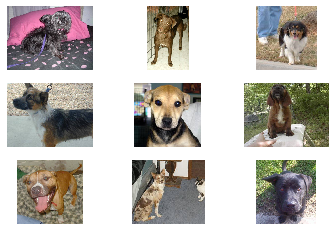

In [4]:
# 犬を表示します

# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.axis('off')
	pyplot.imshow(image)
# show the figure
pyplot.show()

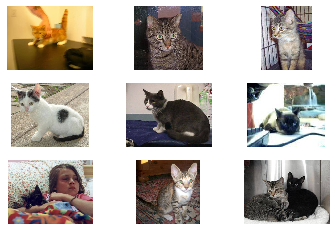

In [5]:
# 猫を表示します

# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.axis('off')
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
# 学習とテストのためにフォルダを分けておきます

from os import makedirs

# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

In [0]:
# それぞれのフォルダにコピーします

from os import listdir
from random import random, seed
from shutil import copyfile

# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.25

# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [8]:
# 基本的なCNNモデルを構築する

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 


Using TensorFlow backend.


In [0]:
# 学習の状況をグラフ表示する関数

# plot diagnostic learning curves
def summarize_diagnostics(hist):
  plt = pyplot
	# plot loss
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = len(loss)
  plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
  plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  
  plt.figure()
	# plot accuracy
  acc = hist.history['acc']
  val_acc = hist.history['val_acc']
  epochs = len(loss)
  plt.plot(range(epochs), acc, marker='.', label='acc(training data)')
  plt.plot(range(epochs), val_acc, marker='.', label='val_acc(evaluationdata)')
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
	# save plot to file
#	filename = sys.argv[0].split('/')[-1]
#	pyplot.savefig(filename + '_plot.png')
  #pyplot.close()
  
  plt.figure()
  plt.show()
 


In [0]:
# 実際に学習して精度を評価する関数

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)

  # prepare iterators
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))

  # fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)

  # evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))

  # learning curves
	summarize_diagnostics(history)
	return model, history
 


Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/20
293/293 [==============================] - 91s 309ms/step - loss: 0.7005 - acc: 0.5397 - val_loss: 0.6786 - val_acc: 0.5881
Epoch 2/20
293/293 [==============================] - 87s 297ms/step - loss: 0.6640 - acc: 0.5953 - val_loss: 0.6467 - val_acc: 0.6157
Epoch 3/20
293/293 [==============================] - 87s 296ms/step - loss: 0.6397 - acc: 0.6285 - val_loss: 0.6529 - val_acc: 0.6165
Epoch 4/20
293/293 [==============================] - 87s 295ms/step - loss: 0.6349 - acc: 0.6338 - val_loss: 0.6391 - val_acc: 0.6156
Epoch 5/20
293/293 [==============================] - 86s 294ms/step - loss: 0.6220 - acc: 0.6460 - val_loss: 0.6376 - val_acc: 0.6302
Epoch 6/20
293/293 [==============================] - 86s 295ms/step - loss: 0.6098 - acc: 0.6586 - val_loss: 0.6146 - val_acc: 0.6538
Epoch 7/20
293/293 [==============================] - 86s 293ms/step - loss: 0.5968 - acc: 0.6666 - val_l

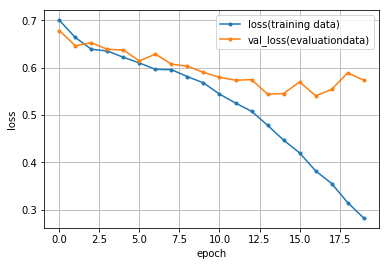

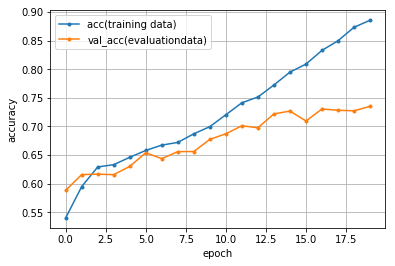

<Figure size 432x288 with 0 Axes>

(<keras.engine.sequential.Sequential at 0x7f6b21ca6a58>,
 <keras.callbacks.History at 0x7f6b1e82f9e8>)

In [50]:
# プログラムを実行します

# entry point, run the test harness
run_test_harness()

In [0]:
# 3層のCNNモデル

# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(hist):
  plt = pyplot
	# plot loss
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = len(loss)
  plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
  plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  
  plt.figure()
	# plot accuracy
  acc = hist.history['acc']
  val_acc = hist.history['val_acc']
  epochs = len(loss)
  plt.plot(range(epochs), acc, marker='.', label='acc(training data)')
  plt.plot(range(epochs), val_acc, marker='.', label='val_acc(evaluationdata)')
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
	# save plot to file
#	filename = sys.argv[0].split('/')[-1]
#	pyplot.savefig(filename + '_plot.png')
  #pyplot.close()
  
  plt.figure()
  plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	return model, history
 


Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/20
293/293 [==============================] - 254s 867ms/step - loss: 0.6652 - acc: 0.5963 - val_loss: 0.6524 - val_acc: 0.5989
Epoch 2/20
293/293 [==============================] - 243s 828ms/step - loss: 0.6197 - acc: 0.6529 - val_loss: 0.5820 - val_acc: 0.6901
Epoch 3/20
293/293 [==============================] - 240s 821ms/step - loss: 0.5941 - acc: 0.6780 - val_loss: 0.5811 - val_acc: 0.6806
Epoch 4/20
293/293 [==============================] - 240s 820ms/step - loss: 0.5727 - acc: 0.7050 - val_loss: 0.5295 - val_acc: 0.7331
Epoch 5/20
293/293 [==============================] - 239s 816ms/step - loss: 0.5568 - acc: 0.7125 - val_loss: 0.5138 - val_acc: 0.7479
Epoch 6/20
293/293 [==============================] - 240s 818ms/step - loss: 0.5407 - acc: 0.7278 - val_loss: 0.5027 - val_acc: 0.7477
Epoch 7/20
293/293 [==============================] - 240s 820ms/step - loss: 0.5260 - acc: 0.7379 

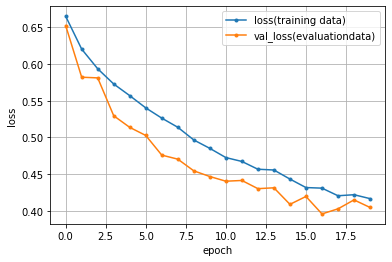

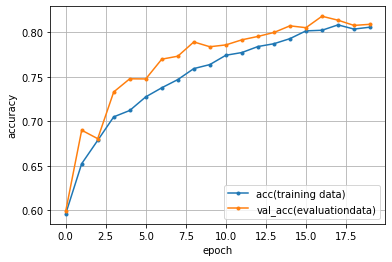

<Figure size 432x288 with 0 Axes>

In [13]:
# entry point, run the test harness
model, history = run_test_harness()

In [0]:
# 遷移学習


# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(hist):
  plt = pyplot
	# plot loss
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = len(loss)
  plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
  plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  
  plt.figure()
	# plot accuracy
  acc = hist.history['acc']
  val_acc = hist.history['val_acc']
  epochs = len(loss)
  plt.plot(range(epochs), acc, marker='.', label='acc(training data)')
  plt.plot(range(epochs), val_acc, marker='.', label='val_acc(evaluationdata)')
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
	# save plot to file
#	filename = sys.argv[0].split('/')[-1]
#	pyplot.savefig(filename + '_plot.png')
  #pyplot.close()
  
  plt.figure()
  plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	return model, history
 

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/10
293/293 [==============================] - 230s 784ms/step - loss: 0.7539 - acc: 0.9465 - val_loss: 0.4033 - val_acc: 0.9714
Epoch 2/10
293/293 [==============================] - 218s 745ms/step - loss: 0.3709 - acc: 0.9734 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 3/10
293/293 [==============================] - 218s 745ms/step - loss: 0.2888 - acc: 0.9779 - val_loss: 0.2170 - val_acc: 0.9746
Epoch 4/10
293/293 [==============================] - 218s 745ms/step - loss: 0.0854 - acc: 0.9822 - val_loss: 0.0576 - val_acc: 0.9776
Epoch 5/10
293/293 [==============================] - 218s 744ms/step - loss: 0.0289 - acc: 0.9924 - val_loss: 0.0604 - val_acc: 0.9784
Epoch 6/10
293/293 [==============================] - 218s 744ms/step - loss: 0.0118 - acc: 0.9975 - val_loss: 0.0639 - val_acc: 0.9795
Epoch 7/10
293/293 [==============================] - 218s 745ms/step - loss: 0.0060 - acc: 0.9994 

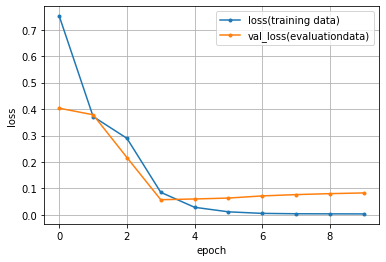

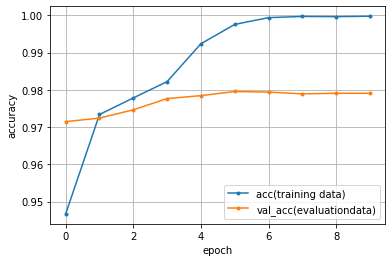

<Figure size 432x288 with 0 Axes>

(<keras.engine.training.Model at 0x7f07ac899358>,
 <keras.callbacks.History at 0x7f07ac8c3e80>)

In [17]:
# entry point, run the test harness
run_test_harness()